In [1]:
import pandas as pd
import numpy as np
import pyvista as pv

In [2]:
df = pd.read_csv('output.csv')
df

,date_time,device_id,tmp,hum,CO2,VOC,vis,IR,WIFI,BLE,rssi,channel_rssi,snr,gateway,channel_index,spreading_factor,bandwidth,f_cnt
0,2022-10-10 14:09:26,hka-aqm-a014,21.10,55.26,528,450,488,61,2,3,-63,-63,8.2,drag-lps8-01,1,7,125000,2
1,2022-10-10 14:18:26,hka-aqm-a014,22.37,51.95,526,450,528,72,2,2,-55,-55,8.2,drag-lps8-01,4,7,125000,3
2,2022-10-10 14:18:47,hka-aqm-a014,22.44,51.73,525,450,647,102,2,1,-57,-57,6.8,drag-lps8-01,5,7,125000,4
3,2022-10-10 14:19:07,hka-aqm-a014,22.50,51.63,525,450,766,130,2,1,-55,-55,8.5,drag-lps8-01,6,7,125000,5
4,2022-10-10 14:19:26,hka-aqm-a014,22.56,51.41,526,450,877,157,1,1,-59,-59,8.5,drag-lps8-01,7,7,125000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824353,2023-09-26 22:50:49,hka-aqm-am308,27.38,37.58,520,950,7,3,2,0,-73,-73,12.2,drag-lps8-05,4,8,125000,12637
824354,2023-09-26 23:05:56,hka-aqm-am308,27.36,37.58,529,948,4,2,1,0,-72,-72,10.0,drag-lps8-05,6,8,125000,12638
824355,2023-09-26 23:21:03,hka-aqm-am308,27.35,37.61,529,966,4,0,6,27,-75,-75,11.8,drag-lps8-05,0,8,125000,12639
824356,2023-09-26 23:36:09,hka-aqm-am308,27.34,37.65,525,944,4,0,0,0,-75,-75,12.0,drag-lps8-05,3,8,125000,12640


In [3]:
import pyvista as pv
import numpy as np

# Create cube vertices
vertices = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
])

# Create cube faces
faces = np.array([
    [0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4],
    [1, 2, 6, 5], [2, 3, 7, 6], [3, 0, 4, 7]
])

# Create cube polydata
cube = pv.PolyData(vertices, faces)

# Create scatter points
n_points = 100
points = np.random.rand(n_points, 3) * 0.8 + 0.1  # Random points within the cube

# Create scatter points polydata
scatter = pv.PolyData(points)

# Create plotter
plotter = pv.Plotter()

# Add cube and scatter points to the plotter
plotter.add_mesh(cube, color='blue', opacity=0.5)
plotter.add_points(scatter, color='red', point_size=5)

# Display the plotter
plotter.show()


C:\Users\paulh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


: 

In [57]:
import numpy as np

import pyvista as pv
from pyvista import examples
# Define some helpers - ignore these and use your own data.
def generate_points(length=10,width=10,height=10,num_cand=100):
    x = np.linspace(0, length, num=num_cand)
    y = np.linspace(0, width, num=num_cand)
    z = np.linspace(0, height, num=num_cand)

    points = []
    for i in x:
        points.append([i, 0, 0])
        points.append([i, 0, height])
        points.append([i, width, 0])
        points.append([i, width, height])

    for i in y:
        points.append([0, i, 0])
        points.append([0, i, height])
        points.append([length, i, 0])
        points.append([length, i, height])

    for i in z:
        points.append([0, 0, i])
        points.append([0, width, i])
        points.append([length, 0, i])
        points.append([length, width, i])

    points = np.array(points)

    return points

points = generate_points()
# Print first 5 rows to prove its a numpy array (n_points by 3)
# Columns are (X Y Z)
points[0:5, :]


array([[ 0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       , 10.       ],
       [ 0.       , 10.       ,  0.       ],
       [ 0.       , 10.       , 10.       ],
       [ 0.1010101,  0.       ,  0.       ]])

In [49]:
length = 10
width = 10
height = 10
num_cand = 10
x = np.linspace(0, length, num=num_cand)
y = np.linspace(0, width, num=num_cand)
z = np.linspace(0, height, num=num_cand)

points = []
for i in range(length+1):
    points.append([i, 0, 0])
    points.append([i, 0, height])
    points.append([i, width, 0])
    points.append([i, width, height])

for i in range(width+1):
    points.append([0, i, 0])
    points.append([0, i, height])
    points.append([length, i, 0])
    points.append([length, i, height])

for i in range(height+1):
    points.append([0, 0, i])
    points.append([0, width, i])
    points.append([length, 0, i])
    points.append([length, width, i])

points = np.array(points)


In [52]:
points

array([[ 0,  0,  0],
       [ 0,  0, 10],
       [ 0, 10,  0],
       [ 0, 10, 10],
       [ 1,  0,  0],
       [ 1,  0, 10],
       [ 1, 10,  0],
       [ 1, 10, 10],
       [ 2,  0,  0],
       [ 2,  0, 10],
       [ 2, 10,  0],
       [ 2, 10, 10],
       [ 3,  0,  0],
       [ 3,  0, 10],
       [ 3, 10,  0],
       [ 3, 10, 10],
       [ 4,  0,  0],
       [ 4,  0, 10],
       [ 4, 10,  0],
       [ 4, 10, 10],
       [ 5,  0,  0],
       [ 5,  0, 10],
       [ 5, 10,  0],
       [ 5, 10, 10],
       [ 6,  0,  0],
       [ 6,  0, 10],
       [ 6, 10,  0],
       [ 6, 10, 10],
       [ 7,  0,  0],
       [ 7,  0, 10],
       [ 7, 10,  0],
       [ 7, 10, 10],
       [ 8,  0,  0],
       [ 8,  0, 10],
       [ 8, 10,  0],
       [ 8, 10, 10],
       [ 9,  0,  0],
       [ 9,  0, 10],
       [ 9, 10,  0],
       [ 9, 10, 10],
       [10,  0,  0],
       [10,  0, 10],
       [10, 10,  0],
       [10, 10, 10],
       [ 0,  0,  0],
       [ 0,  0, 10],
       [10,  0,  0],
       [10,  

In [61]:
points.__len__()

1200

In [60]:
point_cloud = pv.PolyData(points)
point_cloud

PolyData,Information
N Cells,1200
N Points,1200
N Strips,0
X Bounds,"0.000e+00, 1.000e+01"
Y Bounds,"0.000e+00, 1.000e+01"
Z Bounds,"0.000e+00, 1.000e+01"
N Arrays,0


In [59]:
np.allclose(points, point_cloud.points)

ValueError: operands could not be broadcast together with shapes (1200,3) (132,3) 

C:\Users\paulh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\paulh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


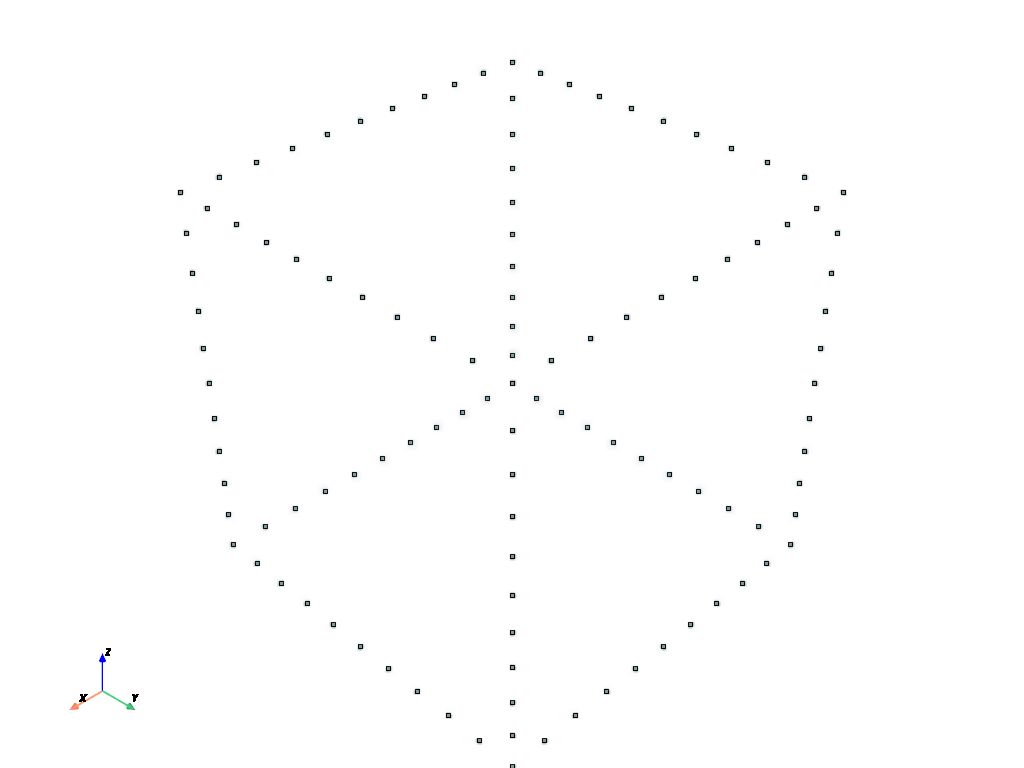

In [58]:
point_cloud.plot(eye_dome_lighting=True)

In [6]:
# Make data array using z-component of points array
data = points[:, -1]

# Add that data to the mesh with the name "uniform dist"
point_cloud["elevation"] = data

C:\Users\paulh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\paulh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


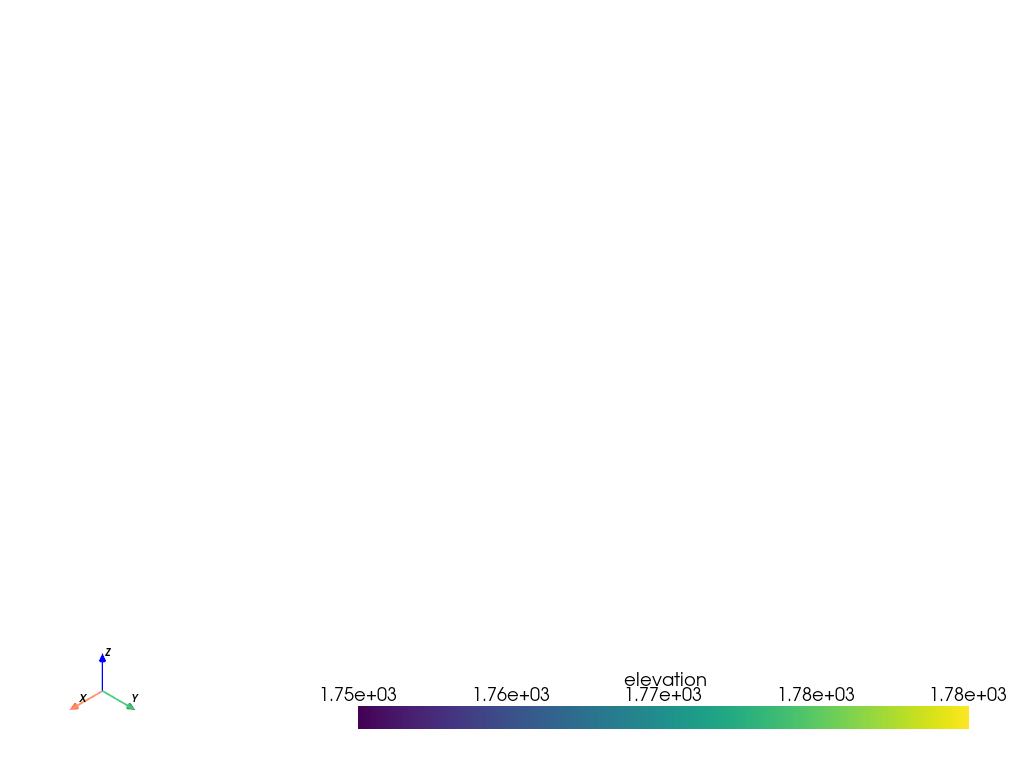

In [8]:
point_cloud.plot(render_points_as_spheres=True)